# **Proyecto Final - Visualizaciones en Python**




---



# Objetivo del proyecto

El objetivo de este proyecto es generar un modelo predictivo que permita determinar como influye cada variable en el rendimiento acádemico de los estudiantes. El propósito final es aportar evidencia empírica que contribuya a comprender los determinantes del desempeño académico y ofrecer insumos para el diseño de estrategias educativas orientadas a mejorar los resultados de aprendizaje.

# Lista de cada columna

| Columnas | Tpo de dato |  Descripcion |
| :-------: | :------: | :-------: |
| Hours_Studied|int| Cantidad de tiempo dedicada al estudio.|
| Attendance|int| Porcentaje o nivel de asistencia a clases.|
| Parental_Involvement|object| Nivel de implicación familiar en la educación.|
| Access_to_Resources|object| Disponibilidad de materiales de estudio (libros, tecnología).|
| Extracurricular_Activities|object| Participación en actividades fuera del aula.|
| Sleep_Hours|int| Promedio de horas que duerme el estudiante.|
| Previous_Scores|int| Notas obtenidas en exámenes o cursos anteriores.|
| Motivation_Level|object| Grado de interés y esfuerzo percibido.|
| Internet_Access|object| Disponibilidad de conexión en casa.|
| Tutoring_Sessions|int| Número de sesiones de apoyo o tutoría recibidas.|
| Family_Income|object| Nivel de ingresos económicos de la familia.|
| Teacher_Quality|object| Nivel de calidad percibida del docente.|
| School_Type|object| Escuela pública o privada.|
| Peer_Influence|object| Cómo afectan los compañeros al rendimiento.|
| Physical_Activity|int| Nivel o frecuencia de ejercicio.|
| Learning_Disabilities|object| Presencia de alguna discapacidad diagnosticada.|
| Parental_Education_Level|object| El nivel de estudios alcanzado por los padres.|
| Distance_from_Home|object| Distancia de la casa a la escuela.|
| Gender|object| El género del estudiante.|
| Exam_Score|int| El resultado final obtenido.|


# Preguntas / Hipótesis de interés

1.¿Existe una relación significativa entre las horas de estudio y el puntaje
obtenido en los exámenes?

2.¿El nivel de involucramiento parental influye en el rendimiento académico del estudiante?

3.¿Los estudiantes con mejor acceso a recursos educativos presentan un desempeño superior?

4.¿Factores de bienestar como las horas de sueño o la actividad física se asocian con mejores resultados académicos?

5.¿La calidad docente y el tipo de escuela (pública o privada) afectan los puntajes de examen?

6.¿El nivel educativo de los padres y los ingresos familiares inciden en el desempeño académico?

7.¿Existen diferencias en el rendimiento según el género?

#Abstract

Este proyecto analiza los factores que influyen en el rendimiento académico de los estudiantes a partir del dataset "Student Performance Factors", compuesto por 6.607 observaciones y 20 variables.

El objetivo principal es identificar las variables más relevantes que determinan el puntaje de examen (Exam_Score), considerado como indicador del desempeño académico. El dataset incluye factores personales (como horas de estudio, horas de sueño y motivación), familiares (nivel educativo de los padres, ingresos y grado de involucramiento), escolares (tipo de institución, calidad docente y tutorías) y sociales (influencia de pares y actividades extracurriculares). Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como Matplotlib, Seaborn y pandas.

Se comienza con una limpieza básica y detección de valores faltantes en columnas categóricas como el nivel educativo parental y la calidad docente. Dado que estos porcentajes eran bajos, se procedió a su imputación utilizando la moda. Posteriormente, se llevó a cabo el Análisis Exploratorio de Datos (EDA), que incluyó la detección y tratamiento de outliers, especialmente en variables numéricas clave como horas de estudio y puntaje de examen, aplicando una técnica de capping (limitación por IQR) para mitigar su impacto.

Dentro del EDA, se analizó la correlación entre todas las variables, un paso crucial para identificar su poder predictivo inicial y detectar posible multicolinealidad. Esto permitió obtener visualizaciones clave que respondieron a hipótesis iniciales sobre la relación entre factores como las horas de estudio, el involucramiento parental y la calidad docente con el desempeño académico.

Para la etapa de Modelado, se separaron las variables predictoras (características) de la variable objetivo (Exam_Score). Se realizó la codificación (encoding) de variables categóricas y el escalado o estandarización de las características numéricas para asegurar un rendimiento óptimo, especialmente para modelos sensibles como la regresión. Finalmente, los datos se dividieron en conjuntos de entrenamiento (80%) y prueba (20%).

Se aplicaron y entrenaron dos modelos de Machine Learning: una Regresión Lineal y un Random Forest Regressor. El paso final fue la evaluación rigurosa de ambos modelos utilizando métricas apropiadas para problemas de regresión (como R^2$, RMSE o MAE) para determinar cuál de los dos lograba predecir correctamente el Exam_Score en el conjunto de prueba, concluyendo que el modelo de Regresión Lineal exhibe un alto nivel de precisión en sus predicciones.





# Importación de librerias y carga del dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
estudiantes_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQhYJQgu4H5GdbEJsCGxyJt_QK7PiXHQqHR9c_t6EXMfioUG03ofhqB2_7W2ee6lEJbdoFA4z14OcnH/pub?output=csv")
estudiantes_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
estudiantes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
estudiantes_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
estudiantes_df.columns = estudiantes_df.columns.str.lower()

Exploración de datos (EDA)

In [ ]:
bins = [0, 60, 70, 80, 101]
labels = ['D', 'C', 'B', 'A']

estudiantes_df['exam_score_cat'] = pd.cut(estudiantes_df['exam_score'], bins=bins, labels=labels, right=False)

In [ ]:
categoricas = estudiantes_df.select_dtypes(include=["object", "category"])
categoricas.head()

,parental_involvement,access_to_resources,extracurricular_activities,motivation_level,internet_access,family_income,teacher_quality,school_type,peer_influence,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score_cat
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male,C
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female,C
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male,B
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male,B
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female,B


In [ ]:
def plot_categoricas(estudiantes_df, columnas, hue=None, n_cols=3):
    n_rows = (len(columnas) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        sns.countplot(
            data=estudiantes_df,
            x=col,
            hue=hue,
            order=estudiantes_df[col].value_counts().index,
            ax=axes[i]
        )
        axes[i].set_title(f"Distribución de {col}" + (f" vs {hue}" if hue else ""))
        axes[i].set_ylabel("Conteo")
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')


    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

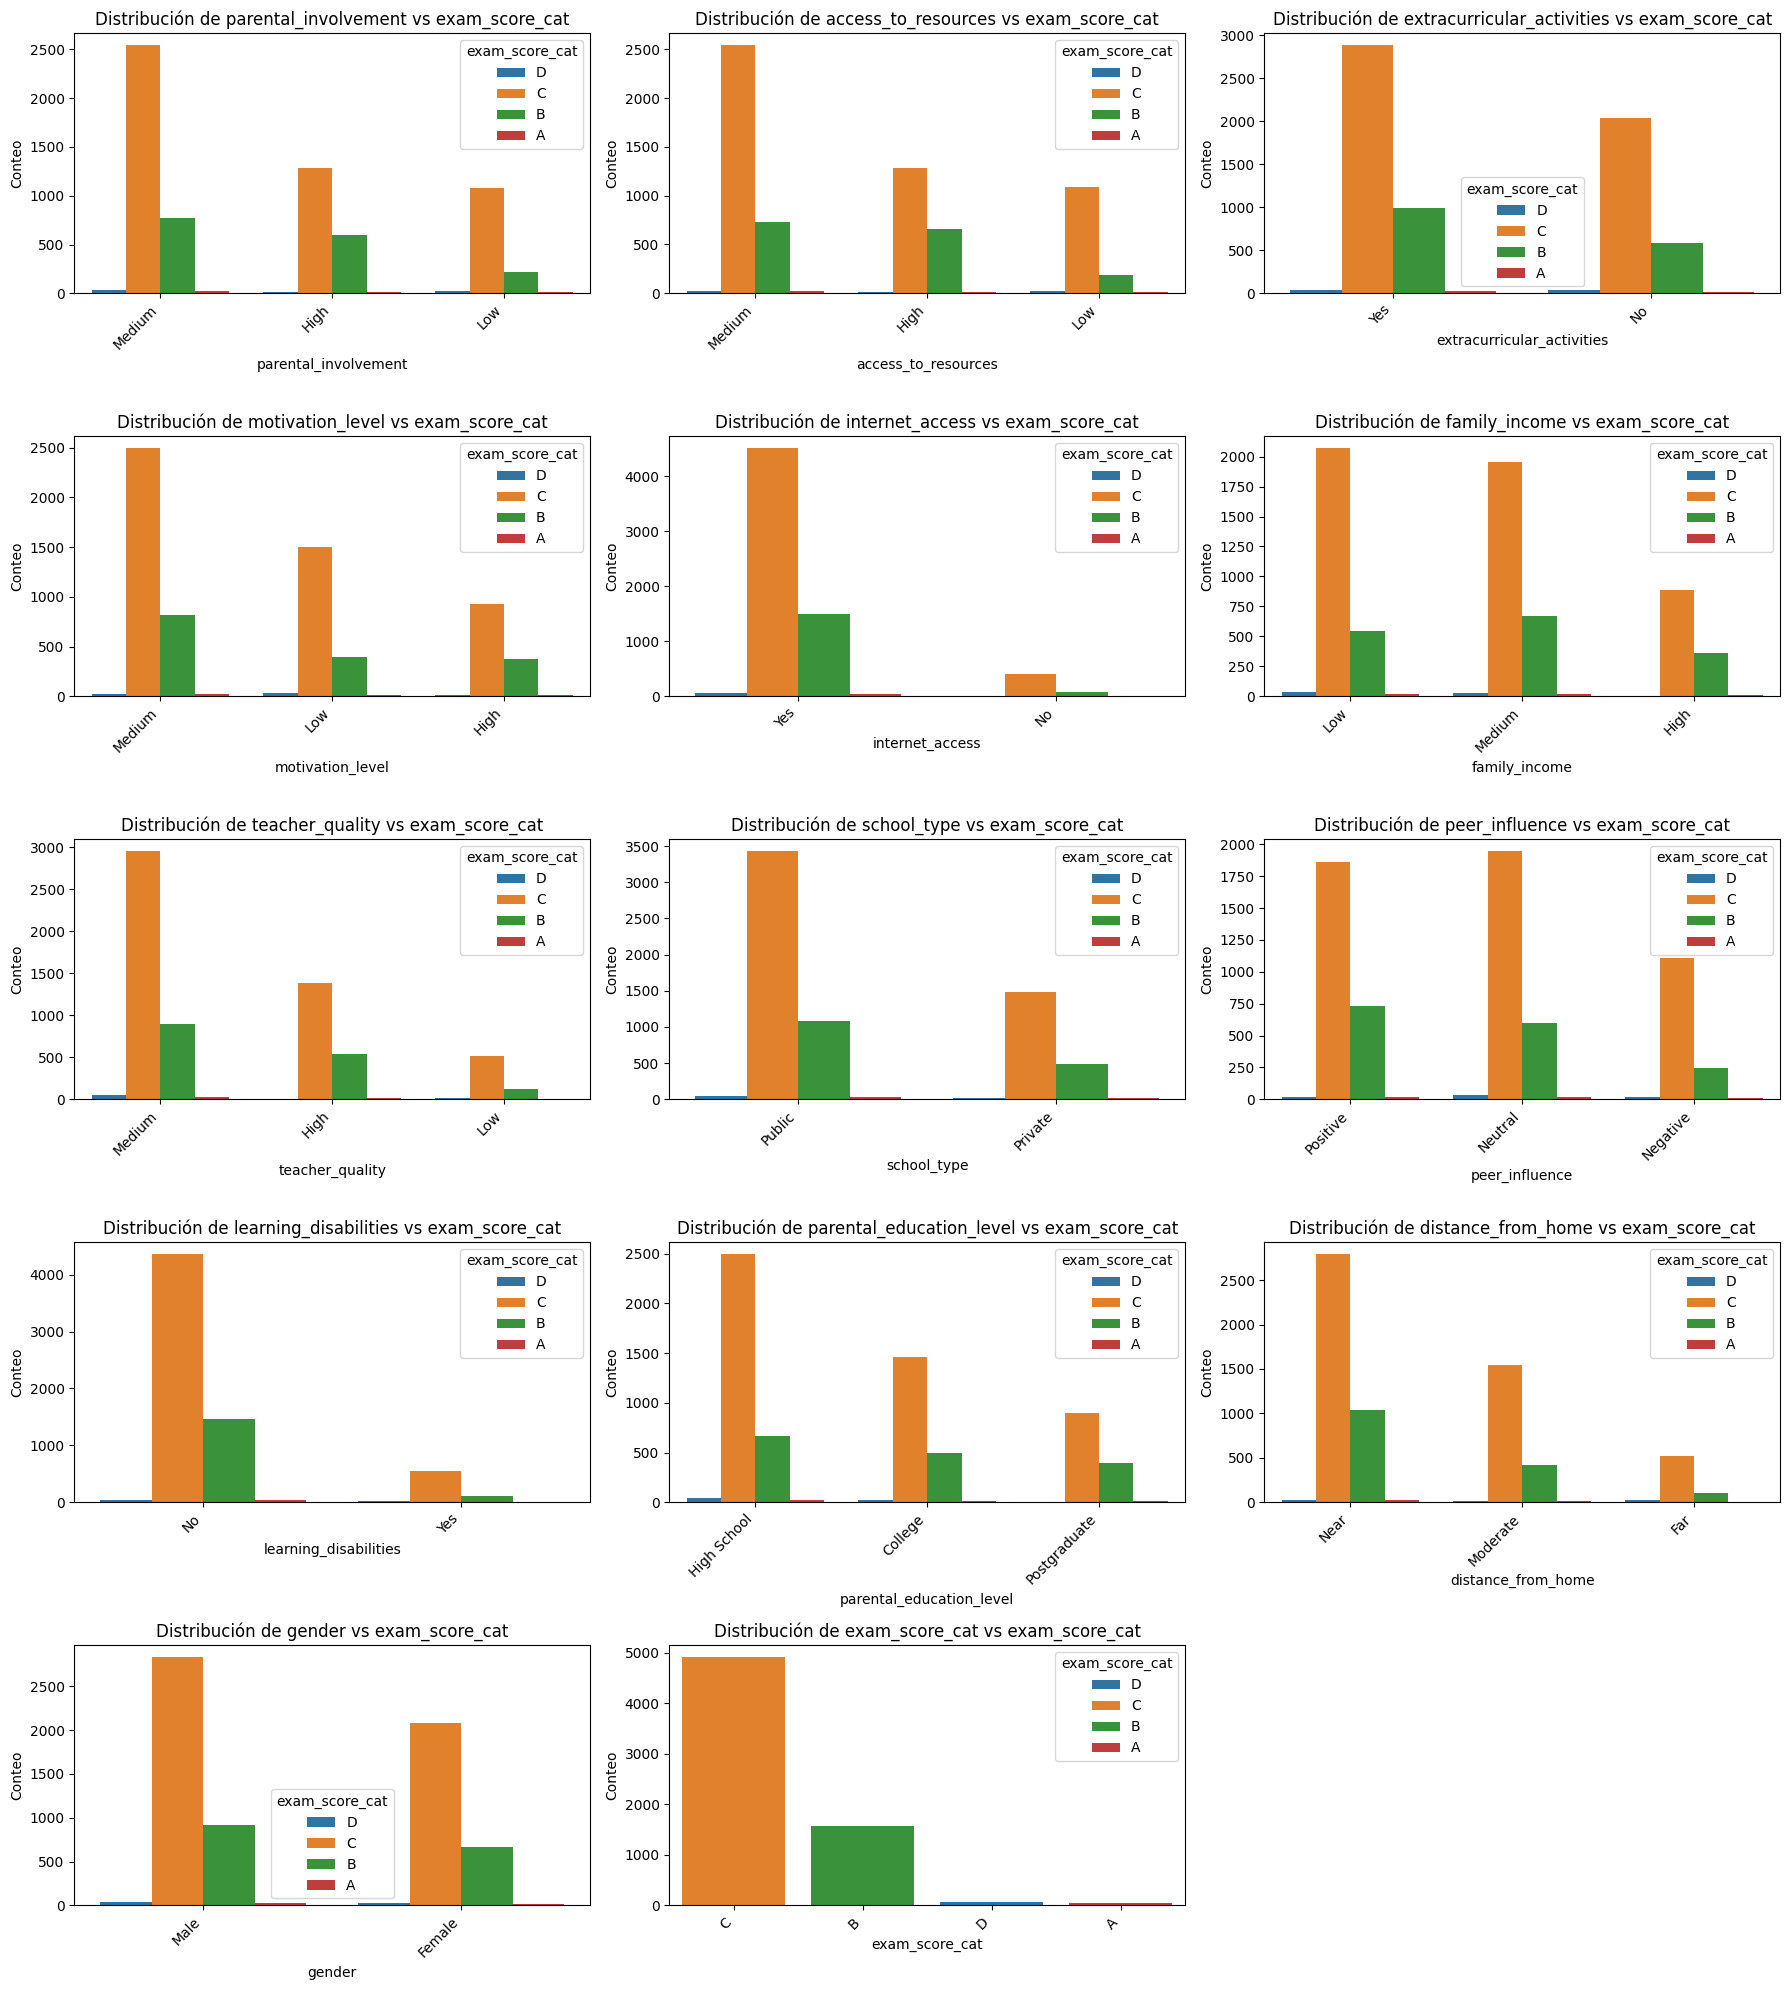

In [ ]:
plot_categoricas(estudiantes_df, categoricas.columns, hue="exam_score_cat")

In [ ]:
numericas = estudiantes_df.select_dtypes(include="int")
numericas.head()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


In [ ]:
def plot_numericas(estudiantes_df, columnas, hue=None, n_cols=3, kind="hist", orient="h"):

    n_rows = (len(columnas) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columnas):
        if kind == "hist":
            sns.histplot(data=estudiantes_df, x=col, hue=hue, kde=True, ax=axes[i], multiple="stack")
            axes[i].set_ylabel("Frecuencia")
        elif kind == "box":
            sns.boxplot(
                data=estudiantes_df,
                x=col,
                y=hue if hue else None,
                orient=orient,
                ax=axes[i]
            )
            axes[i].set_xlabel(col)
        elif kind == "box":
            sns.boxnplot(
                data=estudiantes_df,
                x=col,
                y=hue if hue else None,
                orient=orient,
                ax=axes[i]
            )
            axes[i].set_xlabel(col)

        axes[i].set_title(f"{kind.capitalize()} de {col}" + (f" vs {hue}" if hue else ""))

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


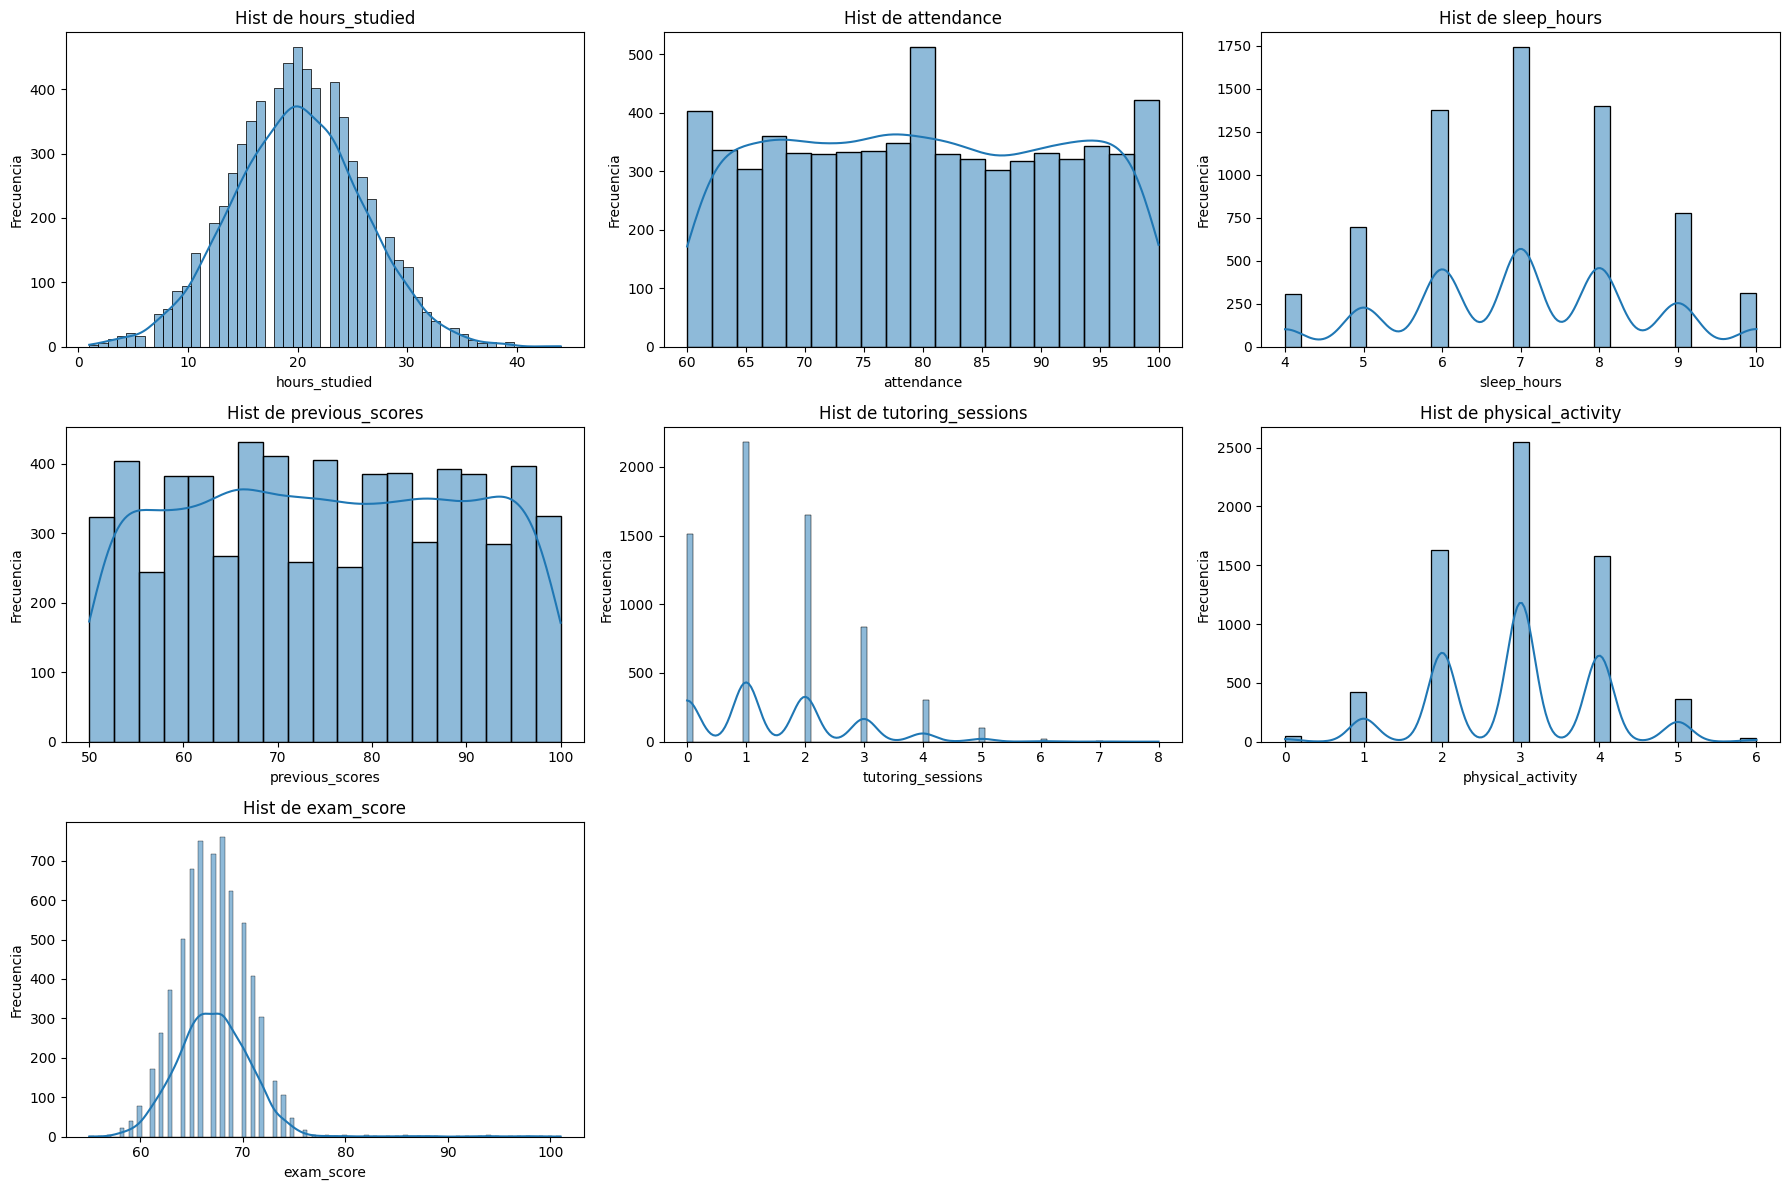

In [ ]:
plot_numericas(estudiantes_df, numericas.columns, kind="hist")

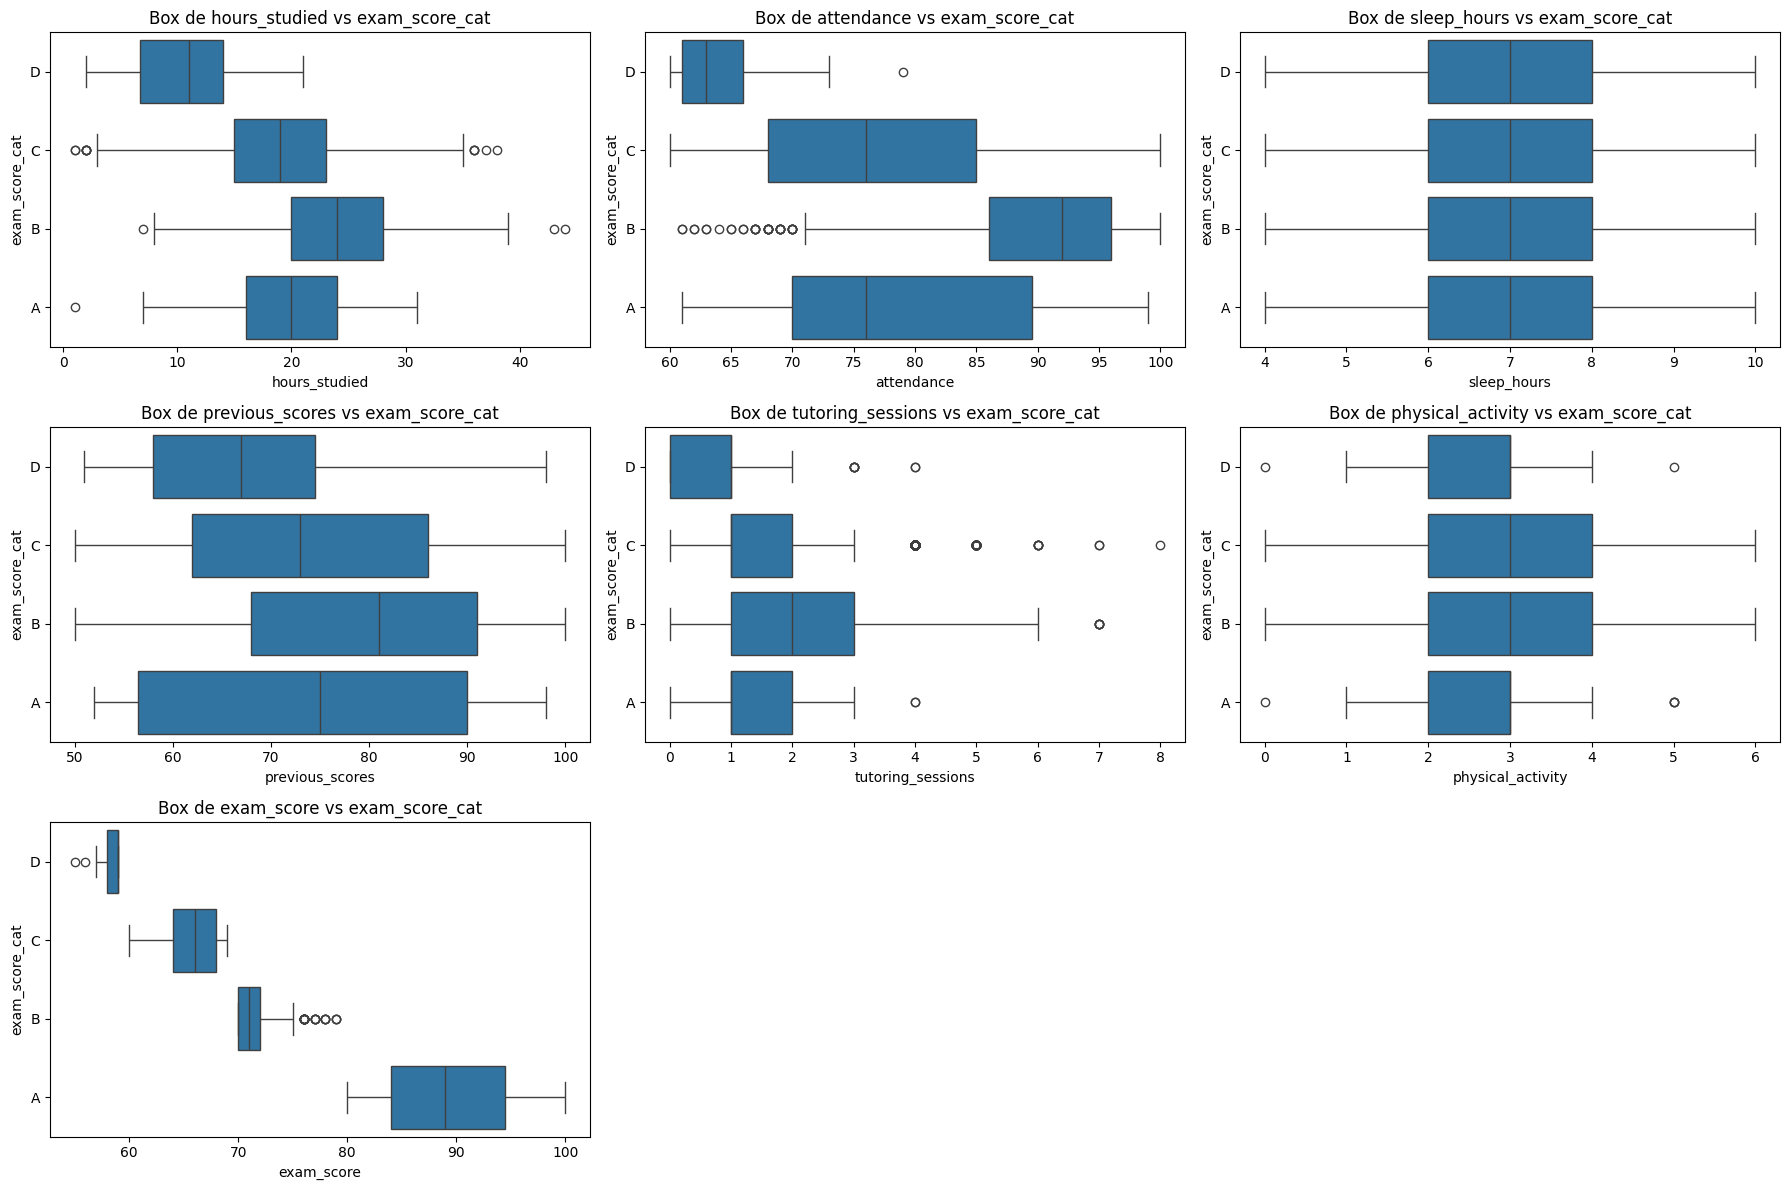

In [ ]:
plot_numericas(estudiantes_df, numericas.columns, hue="exam_score_cat", kind="box")

In [ ]:
estudiantes_df.duplicated().sum()

np.int64(0)

# Imputación de valores nulos

In [ ]:
def calcular_porcentaje_nulls(estudiantes_df: pd.DataFrame) -> None:
    print("Observación de porcentaje de nulls")

    null_counts = estudiantes_df.isna().mean() * 100

    columnas_nulas = null_counts[null_counts > 0].index

    estudiantes_df_resultado = pd.DataFrame({
        "columna": columnas_nulas,
        "porcentaje_nulls": null_counts[columnas_nulas],
        "tipo_de_dato": estudiantes_df.dtypes[columnas_nulas].astype(str)
    }).sort_values(by="porcentaje_nulls", ascending=False)

    df_transpuesto = estudiantes_df_resultado.set_index("columna").T
    df_transpuesto = df_transpuesto.map(lambda x: "{:.2f} %".format(x) if isinstance(x, (float, np.floating)) else x)

    print(df_transpuesto.to_string(index=True))

calcular_porcentaje_nulls(estudiantes_df)

Observación de porcentaje de nulls
columna          parental_education_level teacher_quality distance_from_home exam_score_cat
porcentaje_nulls                   1.36 %          1.18 %             1.01 %         0.02 %
tipo_de_dato                       object          object             object       category


Al ser porcentajes relativamente bajos, se procederá a la imputacion de los mismos a traves de la moda porque son variables categoricas.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
estudiantes_df[categoricas.columns] = pd.DataFrame(cat_imputer.fit_transform(estudiantes_df[categoricas.columns]), columns=categoricas.columns)

estudiantes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   hours_studied               6607 non-null   int64 
 1   attendance                  6607 non-null   int64 
 2   parental_involvement        6607 non-null   object
 3   access_to_resources         6607 non-null   object
 4   extracurricular_activities  6607 non-null   object
 5   sleep_hours                 6607 non-null   int64 
 6   previous_scores             6607 non-null   int64 
 7   motivation_level            6607 non-null   object
 8   internet_access             6607 non-null   object
 9   tutoring_sessions           6607 non-null   int64 
 10  family_income               6607 non-null   object
 11  teacher_quality             6607 non-null   object
 12  school_type                 6607 non-null   object
 13  peer_influence              6607 non-null   obje

In [ ]:
estudiantes_df.isna().sum()

,0
hours_studied,0
attendance,0
parental_involvement,0
access_to_resources,0
extracurricular_activities,0
sleep_hours,0
previous_scores,0
motivation_level,0
internet_access,0
tutoring_sessions,0


# Detección y tratamiento de outliers

In [ ]:
def detect_outliers_iqr(estudiantes_df, col, group_col):
    outliers = pd.Series(False, index=estudiantes_df.index)
    for g in estudiantes_df[group_col].unique():
        subset = estudiantes_df[estudiantes_df[group_col] == g][col]
        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers |= (estudiantes_df[col] < lower_bound) & (estudiantes_df[group_col] == g)
        outliers |= (estudiantes_df[col] > upper_bound) & (estudiantes_df[group_col] == g)
    return outliers

In [ ]:
outliers_study = detect_outliers_iqr(estudiantes_df, 'hours_studied', 'exam_score_cat')
outliers_attendance = detect_outliers_iqr(estudiantes_df, 'attendance', 'exam_score_cat')
outliers_tutoring = detect_outliers_iqr(estudiantes_df, 'tutoring_sessions', 'exam_score_cat')
outliers_activity= detect_outliers_iqr(estudiantes_df, 'physical_activity', 'exam_score_cat')
outliers_exam= detect_outliers_iqr(estudiantes_df, 'exam_score', 'exam_score_cat')

In [ ]:
print("Total outliers hours_studied vs exam_score_cat:", outliers_study.sum())
print("Total outliers attendance vs exam_score_cat:", outliers_attendance.sum())
print("Total outliers tutoring_sessions vs exam_score_cat:", outliers_tutoring.sum())
print("Total outliers physical_activity vs exam_score_cat:", outliers_activity.sum())
print("Total outliers exam_score vs exam_score_cat:", outliers_exam.sum())

Total outliers hours_studied vs exam_score_cat: 16
Total outliers attendance vs exam_score_cat: 36
Total outliers tutoring_sessions vs exam_score_cat: 281
Total outliers physical_activity vs exam_score_cat: 6
Total outliers exam_score vs exam_score_cat: 31


In [ ]:
sesgo_analysis = estudiantes_df.groupby('exam_score_cat').agg({
    'hours_studied': ['count', 'skew'],
    'attendance': ['count', 'skew'],
    'tutoring_sessions': ['count', 'skew'],
    'exam_score': ['count', 'skew'],
}).round(3)

print(sesgo_analysis)

               hours_studied        attendance        tutoring_sessions  \
                       count   skew      count   skew             count   
exam_score_cat                                                            
A                         47 -0.551         47  0.274                47   
B                       1577  0.070       1577 -1.056              1577   
C                       4915 -0.002       4915  0.314              4915   
D                         68 -0.071         68  1.436                68   

                      exam_score         
                 skew      count   skew  
exam_score_cat                           
A               0.522         47  0.039  
B               0.785       1577  1.289  
C               0.786       4915  0.217  
D               1.229         68 -1.925  


In [ ]:
def cap_outliers_iqr(estudiantes_df, col, group_col, factor_dict=None):
    estudiantes_df_copia = estudiantes_df.copy()
    if factor_dict is None:
        factor_dict = {}

    for cat in estudiantes_df_copia[group_col].unique():
        mask = estudiantes_df_copia[group_col] == cat
        series = estudiantes_df_copia.loc[mask, col]

        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1

        factor = factor_dict.get(cat, 1.5)
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        estudiantes_df_copia.loc[mask, col] = series.clip(lower=lower, upper=upper)

    return estudiantes_df_copia


In [ ]:
factor_limits = {'A': 1.5, 'B': 1.5, 'C': 1.0, 'D': 0.8}

In [ ]:
estudiantes_df_clean = estudiantes_df.copy()
estudiantes_df_clean = cap_outliers_iqr(estudiantes_df_clean, 'hours_studied', 'exam_score_cat', factor_limits)
estudiantes_df_clean = cap_outliers_iqr(estudiantes_df_clean, 'attendance', 'exam_score_cat', factor_limits)
estudiantes_df_clean = cap_outliers_iqr(estudiantes_df_clean, 'tutoring_sessions', 'exam_score_cat', factor_limits)
estudiantes_df_clean = cap_outliers_iqr(estudiantes_df_clean, 'physical_activity', 'exam_score_cat', factor_limits)
estudiantes_df_clean = cap_outliers_iqr(estudiantes_df_clean, 'exam_score', 'exam_score_cat', factor_limits)

/tmp/ipython-input-2717109067.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[13.  16.  15.   4.   4.  12.   3.   5.  13.  13.  12.  16.   4.  10.
  9.   6.  15.  15.  13.  14.   4.   7.   7.   7.  19.8  2.  12.  13.
  7.  12.  13.  17.   7.  14.  11.  14.   9.   3.   5.  13.  11.   8.
  3.   8.   3.   6.  16.   7.  10.  14.  15.  15.   5.  11.  16.  18.
  9.  12.  10.  10.  13.   3.  13.  19.  13.  15.   4.   4. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  estudiantes_df_copia.loc[mask, col] = series.clip(lower=lower, upper=upper)
/tmp/ipython-input-2717109067.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.  0.  2.  2.  1.  1.  0.  2.  2.  1.  2.  1.  2.  1.  1.  2.  1.  3.
 1.  2.  1.  2.  1.  1.  3.  0.  0.  0.  0.  2.  3.5 1.  3.5 0.  3.  1.
 1.  1.  0.  2. 

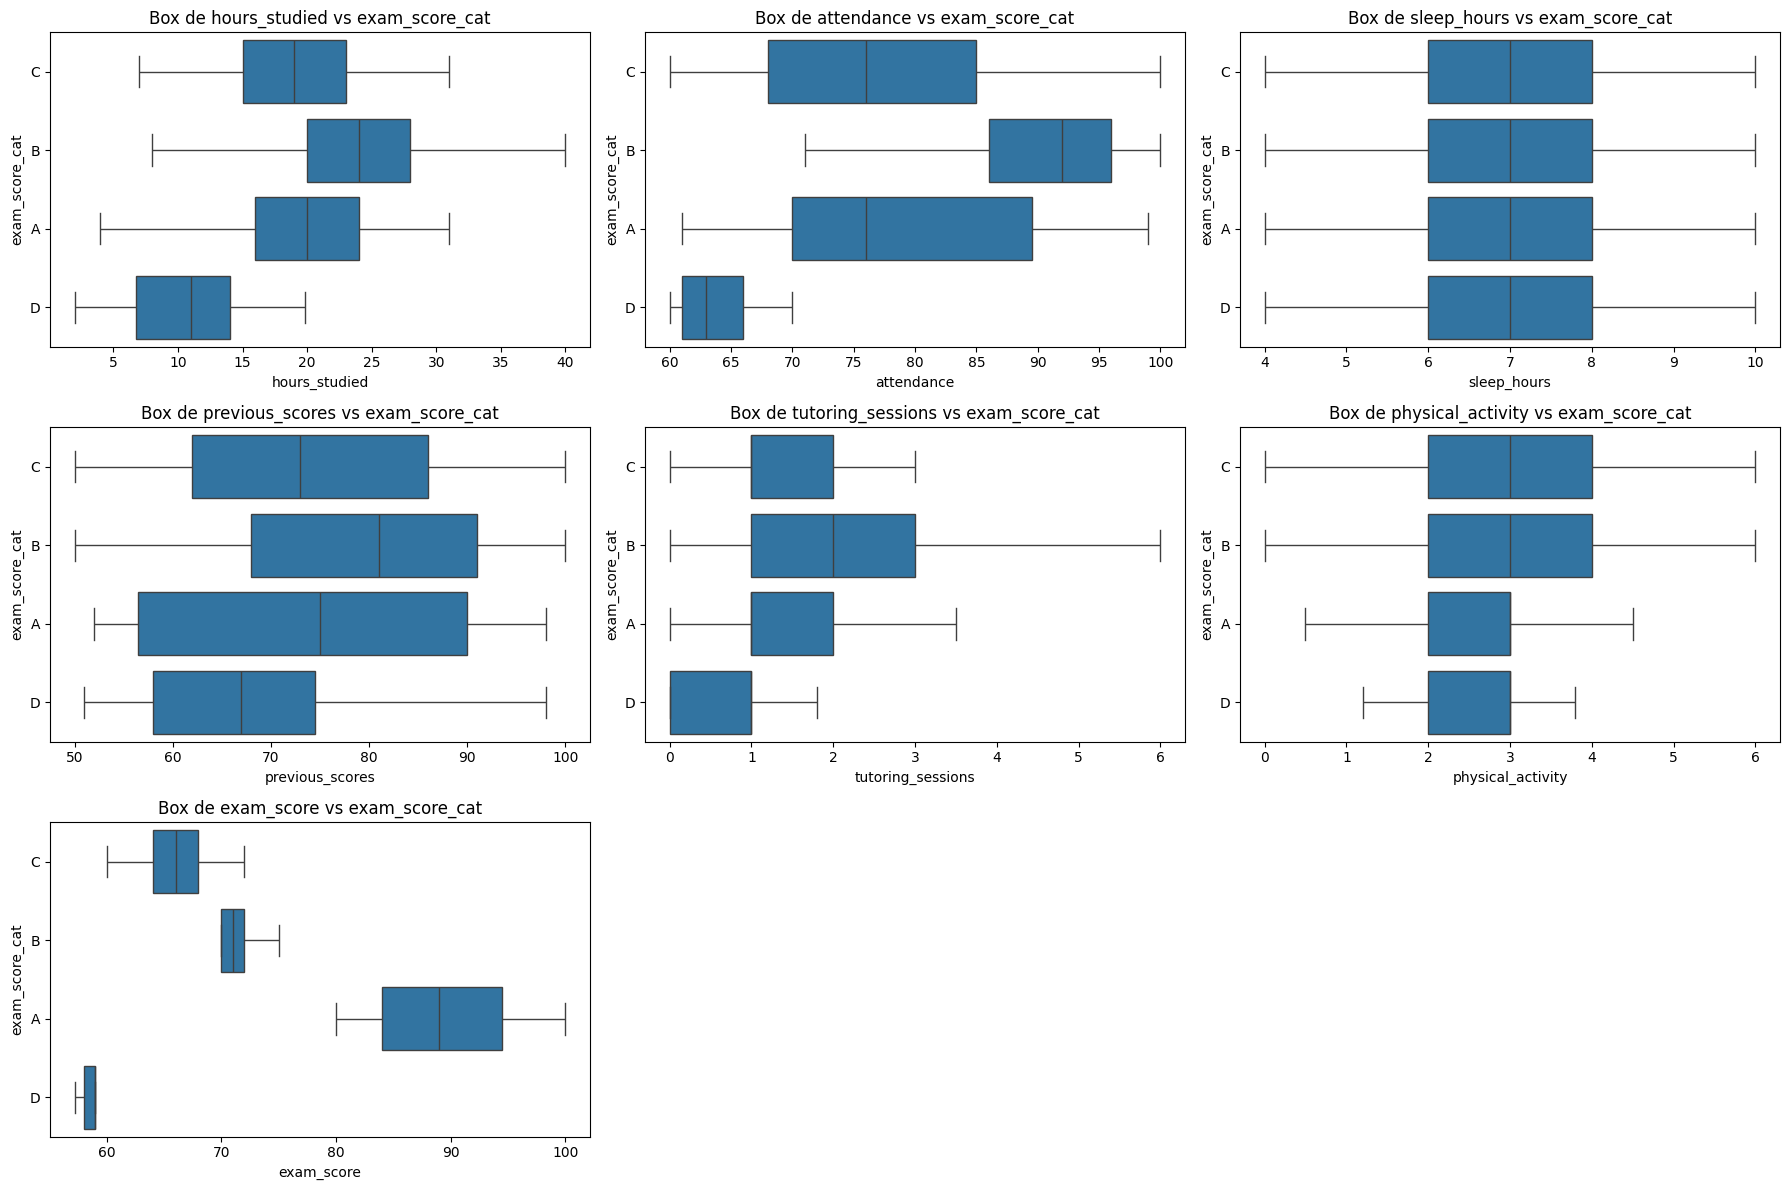

In [ ]:
plot_numericas(estudiantes_df_clean, numericas.columns, hue="exam_score_cat", kind="box")

# Matriz de correlación.

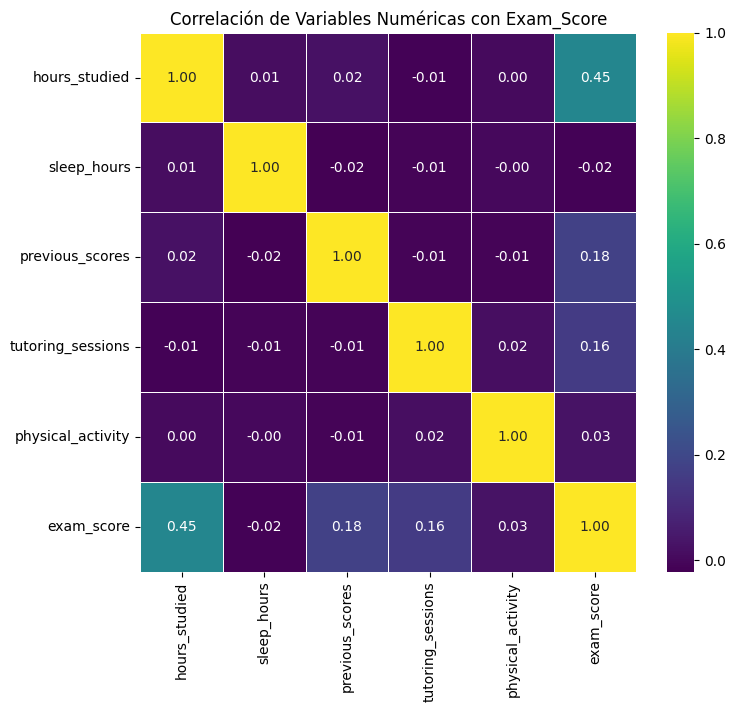

In [ ]:
variables_numericas = [
    'hours_studied', 'sleep_hours', 'previous_scores',
    'tutoring_sessions', 'physical_activity', 'exam_score'
]
df_numerico = estudiantes_df[variables_numericas]

matriz_numerica = df_numerico.corr(method='pearson')

plt.figure(figsize=(8, 7))
sns.heatmap(
    matriz_numerica,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    linewidths=.5,
)
plt.title('Correlación de Variables Numéricas con Exam_Score')
plt.show()

A traves de este mapa de calor se puede observar la relacion de las variables numericas del dataset de estudio, donde podemos identificar que las horas de estudio que el estudiante dedica esta fuertemente realacionado con el puntaje del examen.
Tambien podemos observar que las variables sleep_hours y physical_activity son los predictores numéricos más débiles y podrían considerarse eliminarlas para simplificar el modelo.

# Codificación de variables categoricas

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler

In [ ]:
label_encoder = LabelEncoder()

for col in categoricas:
    estudiantes_df[col] = label_encoder.fit_transform(estudiantes_df[col])


estudiantes_df.head()

,hours_studied,attendance,parental_involvement,access_to_resources,extracurricular_activities,sleep_hours,previous_scores,motivation_level,internet_access,tutoring_sessions,...,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score,exam_score_cat
0,23,84,1,0,0,7,73,1,1,0,...,2,1,2,3,0,1,2,1,67,2
1,19,64,1,2,0,8,59,1,1,2,...,2,1,0,4,0,0,1,0,61,2
2,24,98,2,2,1,7,91,2,1,2,...,2,1,1,4,0,2,2,1,74,1
3,29,89,1,2,1,8,98,2,1,1,...,2,1,0,4,0,1,1,1,71,1
4,19,92,2,2,1,6,65,2,1,3,...,0,1,1,4,0,0,2,0,70,1


# Correlación

Antes de realizar la correlación entre todas las variables, elimino exam_score_cat ya que esta es redundante y produce multicolinealidad

In [ ]:
estudiantes_df = estudiantes_df.drop(columns=['exam_score_cat'])

In [ ]:
correlacion = estudiantes_df.corr(numeric_only=True)

Como la cantidad de variables de mi dataset es muy elevada voy a establecer un umbral para que aquellas que tengan una correlaccion menos a 0.08 no se muestren en la matriz.

In [ ]:
umbral = 0.08
correlaciones_target = abs(correlacion['exam_score']).sort_values(ascending=False)
columnas_a_mantener = correlaciones_target[correlaciones_target >= umbral].index.tolist()

matriz_filtrada = correlacion.loc[columnas_a_mantener, columnas_a_mantener]

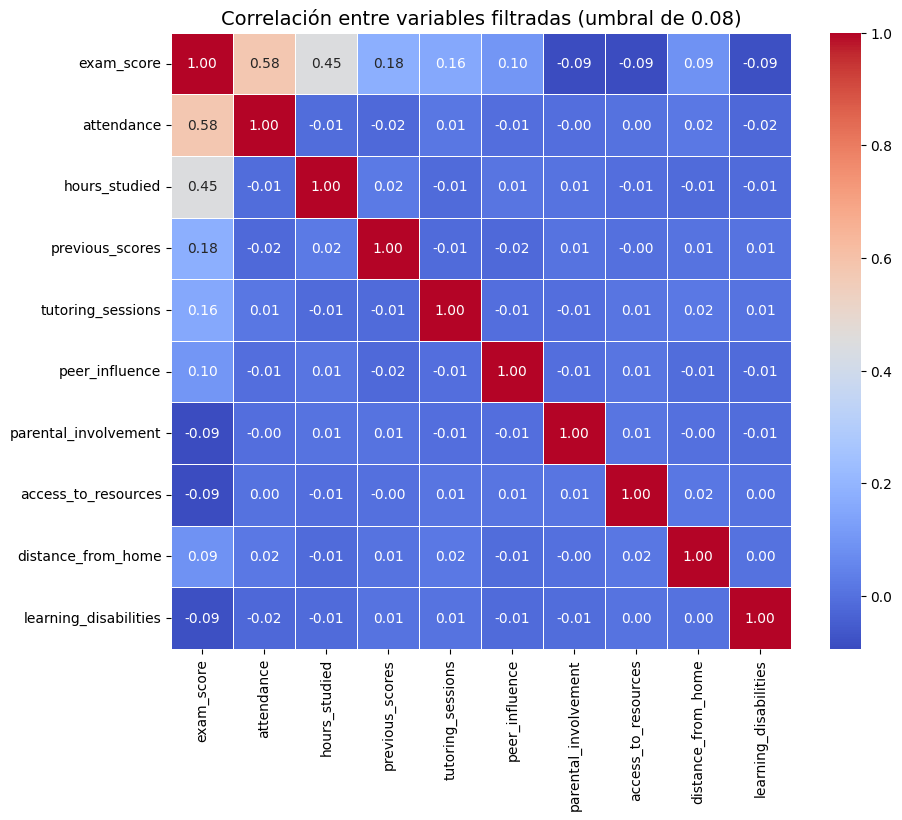

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    matriz_filtrada,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='white'
)
plt.title('Correlación entre variables filtradas (umbral de 0.08)', fontsize=14)
plt.show()

La matriz de correlación muestra que el rendimiento académico está influido principalmente por factores ligados al esfuerzo del estudiante y su entorno académico inmediato. Las variables que presentan las asociaciones más fuertes y positivas con el puntaje son la asistencia a clases y las horas de estudio, lo que sugiere que la constancia y la dedicación desempeñan un papel central en el desempeño escolar.
Variables como el puntaje previo y las tutorias influyen positivamente pero con un impacto menor.
Las correlaciones negativas identificadas son débiles, por lo que no parecen tener un impacto relevante sobre los resultados.

# Análisis univariado

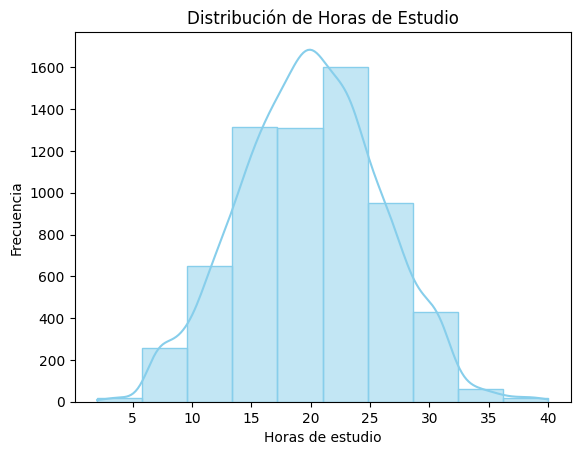

In [ ]:
sns.histplot(estudiantes_df_clean['hours_studied'], bins=10, kde=True, color="skyblue", edgecolor="Skyblue")
plt.title("Distribución de Horas de Estudio")
plt.xlabel("Horas de estudio")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
print("=== ESTADÍSTICAS HORAS DE ESTUDIO ===")
print(f"Media: {estudiantes_df_clean['hours_studied'].mean():.2f} horas")
print(f"Mediana: {estudiantes_df_clean['hours_studied'].median():.2f} horas")
print(f"Moda: {estudiantes_df_clean['hours_studied'].mode().values[0]:.2f} horas")
print(f"Rango: {estudiantes_df_clean['hours_studied'].min():.1f} - {estudiantes_df_clean['hours_studied'].max():.1f} horas")
print(f"Desviación estándar: {estudiantes_df_clean['hours_studied'].std():.2f} horas")


=== ESTADÍSTICAS HORAS DE ESTUDIO ===
Media: 19.98 horas
Mediana: 20.00 horas
Moda: 20.00 horas
Rango: 2.0 - 40.0 horas
Desviación estándar: 5.89 horas


La cantidad de horas que los estudiantes dedican al estudio es de 20hs semanales, siendo esta una distribucion normal y simetrica, con una dispersión moderada (~6 horas).
La mayoría de los estudiantes dedican entre 15 y 25 horas de estudio, y sólo unos pocos se alejan mucho de ese rango.

## Análisis bivariado

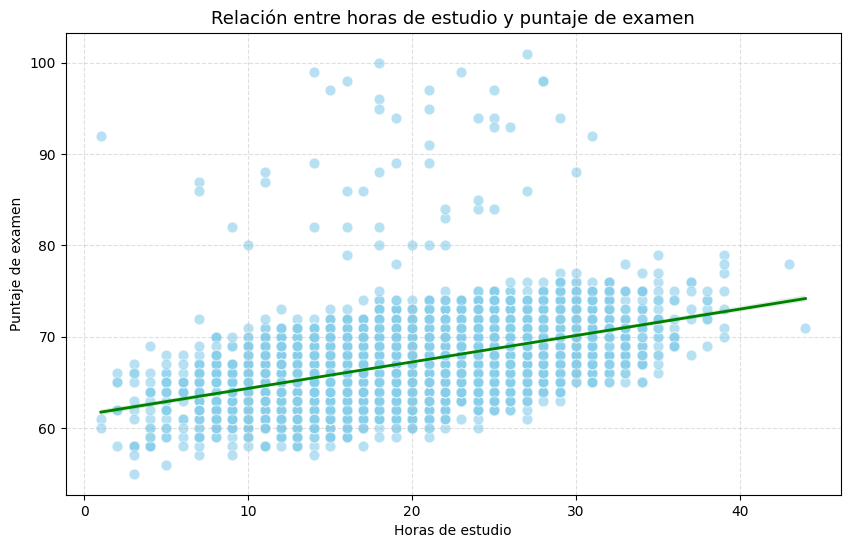

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='hours_studied', y='exam_score', data=estudiantes_df, color='skyblue', alpha=0.6, s=60)
sns.regplot(x='hours_studied', y='exam_score', data=estudiantes_df, scatter=False, color='green', line_kws={'linewidth':2})

plt.title('Relación entre horas de estudio y puntaje de examen', fontsize=13)
plt.xlabel('Horas de estudio')
plt.ylabel('Puntaje de examen')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

A traves de esta visualizacion podemos notar que la relacion entre las horas de estudio y el puntaje de los examenes tiene una correlación postiva moderada, debido a que estudiar mas suele mejorar el rendimiento pero no garantiza un puntaje alto.
Los datos estan bastante dispersos lo que significa que el rendimiento depende tambien de otros factores, no solo de las horas de estudio.

# Análisis multivariado

In [ ]:
print(estudiantes_df_clean['access_to_resources'].unique())

['High' 'Medium' 'Low']


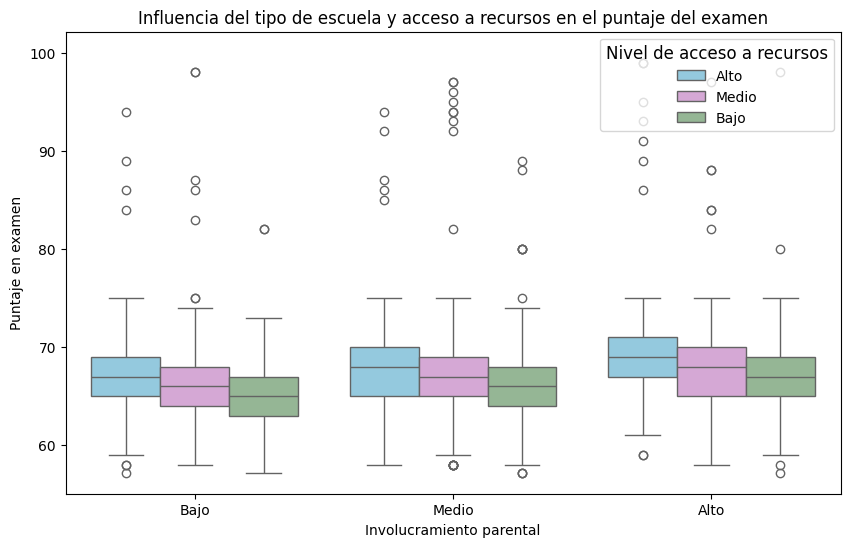

In [ ]:
colores = {
    'Alto': 'skyblue',
    'Medio': 'plum',
    'Bajo': 'darkseagreen'
}

estudiantes_df_clean['parental_involvement'] = estudiantes_df_clean['parental_involvement'].replace({
    'High': 'Alto',
    'Medium': 'Medio',
    'Low': 'Bajo'
})


estudiantes_df_clean['access_to_resources'] = estudiantes_df_clean['access_to_resources'].replace({
    'High': 'Alto',
    'Medium': 'Medio',
    'Low': 'Bajo'
})


plt.figure(figsize=(10,6))

sns.boxplot(
    data=estudiantes_df_clean,
    x='parental_involvement',
    y='exam_score',
    hue='access_to_resources',
    palette=colores

)
plt.title("Influencia del tipo de escuela y acceso a recursos en el puntaje del examen")
plt.xlabel("Involucramiento parental")
plt.ylabel("Puntaje en examen")
plt.legend(title="Nivel de acceso a recursos", title_fontsize=12, fontsize=10, loc='upper right')
plt.show()

Podemos concluir que tanto el involucramiento parental como el acceso a recursos influyen en el rendimiento académico.
Aunque el impacto del acceso a recursos parece más marcado, un mayor involucramiento parental puede mejorar el desempeño incluso en contextos con menos recursos.

# Separación de variables

In [ ]:
y = estudiantes_df["exam_score"]
X = estudiantes_df.drop(["exam_score"], axis=1)

# División de los datos en conjuntos de entrenamiento (80%) y prueba (20%)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de datos para que todos esten en la misma medida

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Para entrenar los datos se utiliza el modelo de Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

modelo.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_lr=modelo.predict(X_test)

# Metricas para interpretar si el modelo es bueno

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
mape = mean_absolute_percentage_error(y_test, y_pred_lr) * 100

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f} %")

MAE: 1.016
RMSE: 2.097
R²: 0.6888
MAPE: 1.47 %


MAE: El modelo se equivoca en promedio 1.016 puntos en la nota del examen. Esto representa un muy bajo nivel de error.

RMSE: En promedio, la predicción se desvía 2.097 puntos.

R²: El modelo explica el 68% de la variabilidad del puntaje del examen. Esto es bueno para problemas de educación, debido a que el rendimiento academico depende de mas factores que no han sido analizados.

MAPE: El error porcentual es extremadamente bajo lo que significa que el modelo es muy preciso.

Todas estas metricas indican que el modelo funciona bien, tiene bajo error lo que significa que la diferencia entre lo predicho y lo real es muy pequeña; muy buena capacidad de explicacion, el modelo entiende porque la nota es baja o alta y por ultimo tiene una alta precision porcentual, lo que se predice es casi igual a lo real.


# Visualizacion Real vs Predicho - Regresión lineal


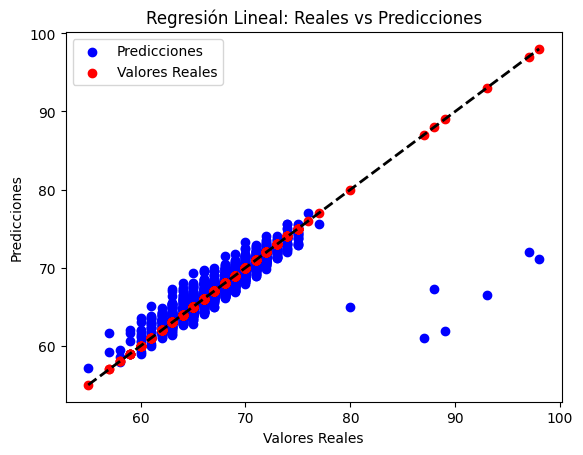

In [ ]:
plt.scatter(y_test,y_pred_lr, color="blue", label="Predicciones")
plt.scatter(y_test, y_test, color = "red", label="Valores Reales")

plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Reales vs Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.legend()
plt.show()

El análisis visual del gráfico Reales vs. Predicciones para el modelo de Regresión Lineal indica un buen desempeño general, especialmente en el rango de puntajes de examen medios (entre 60 y 78), donde las predicciones se agrupan estrechamente alrededor de la línea de perfección. Sin embargo, el modelo muestra una clara disminución en la precisión en los extremos superiores de la distribución, tendiendo a subestimar consistentemente los puntajes más altos (superiores a 80). La presencia de algunos errores de predicción significativos (puntos azules muy dispersos) sugiere que el modelo lineal podría no estar capturando adecuadamente las relaciones no lineales presentes en el dataset. Por lo tanto, se justifica la comparación con el Random Forest Regressor, un modelo no lineal, para lograr una mayor robustez y precisión en todo el rango de predicciones, especialmente en los casos de alto rendimiento.


## Se aplica otro algoritmo para ver si las metricas pueden ser mejores, se utiliza el modelo Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train_scaled, y_train)

y_pred_rf = model.predict(X_test_scaled)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf) * 100

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f} %")

MAE: 1.117
RMSE: 2.191
R²: 0.6603
MAPE: 1.63 %


MAE: El modelo se equivoca en promedio 1.12 puntos en la nota del examen.
Esto representa un muy bajo nivel de error.

RMSE: En promedio, la predicción se desvía 2.19 puntos.

R²: El modelo explica el 66% de la variabilidad del puntaje del examen. Esto es bueno para problemas de educación, debido a que el rendimiento academico depende de mas factores que no han sido analizados.

MAPE: El error porcentual es extremadamente bajo lo que significa que el modelo es muy preciso.

Todas estas metricas indican que el modelo funciona bien, tiene bajo error lo que significa que la diferncia entre lo predicho y lo real es muy pequeña; muy buena capacidad de explicacion, el modelo entiende porque la nota es baja o alta y por ultimo tiene una alta precision porcentual, lo que se predice es casi igual a lo real.

# Visualizacion Real vs Predicho - Random Forest Regressor

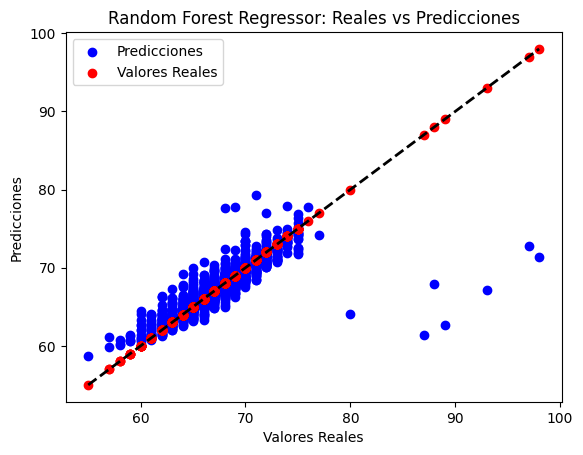

In [ ]:
plt.scatter(y_test,y_pred_rf, color="blue", label="Predicciones")
plt.scatter(y_test, y_test, color = "red", label="Valores Reales")

plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Random Forest Regressor: Reales vs Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.legend()
plt.show()

El análisis visual del gráfico Reales vs. Predicciones para el modelo Random Forest Regressor muestra una mejora significativa en el rendimiento general respecto a la Regresión Lineal. La mayor parte de los puntos de predicción (azules) se encuentran más concentrados y pegados a la línea de predicción perfecta en todo el rango de puntajes de examen, lo que sugiere una mejor capacidad de generalización y una reducción en el error.

Si bien el modelo sigue siendo muy preciso en el rango medio (60 a 78), una de sus mayores fortalezas es su mejor capacidad para manejar los puntajes más altos (superiores a 80). Aunque aún existe cierta dispersión y el modelo tiende ligeramente a la subestimación en los extremos, el error es visiblemente menor que en el modelo lineal. No obstante, al igual que en la Regresión Lineal, persisten unos pocos errores atípicos muy grandes (puntos dispersos), lo que indica que, a pesar de ser un modelo no lineal y robusto, hay un pequeño subconjunto de datos con características únicas que ambos modelos encuentran difíciles de predecir.

En conclusión, el Random Forest Regressor es el modelo con el mejor desempeño visual, demostrando ser más robusto para capturar las relaciones complejas y ofreciendo una predicción más consistente en el rango completo de puntajes de examen.

# Comparación grafica de las metricas de los dos modelos

In [ ]:
datos = {
   'Modelo': [
        'Regresión Lineal', 'Regresión Lineal', 'Regresión Lineal', 'Regresión Lineal',
        'Random Forest Regressor', 'Random Forest Regressor', 'Random Forest Regressor', 'Random Forest Regressor'
    ],
    'Métrica': ['MAE', 'RMSE', 'R2', 'MAPE', 'MAE', 'RMSE', 'R2', 'MAPE'],
    'Valor': [1.016, 2.097, 0.6888, 1.47, 1.117, 2.191, 0.6603, 1.63]
}
df_metricas = pd.DataFrame(datos)

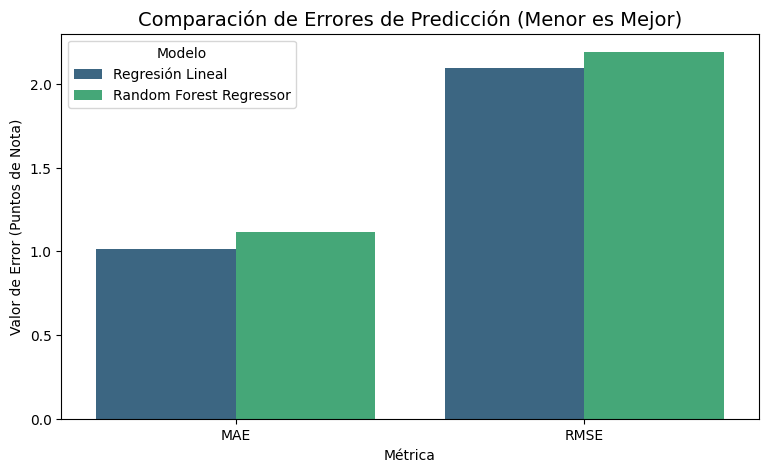

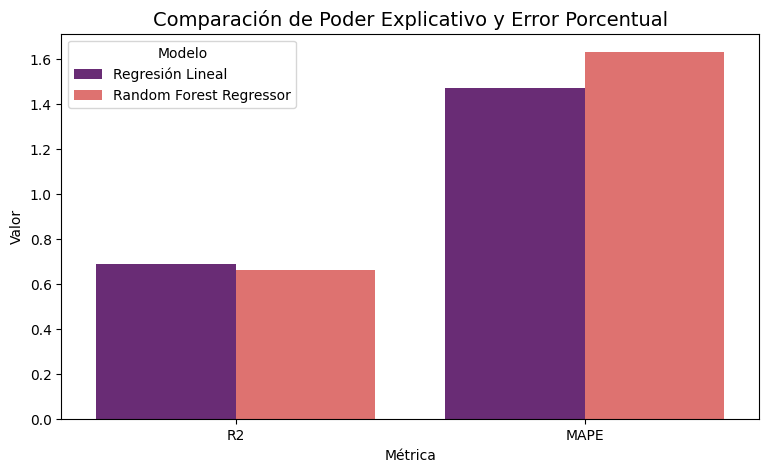

In [ ]:
df_errores = df_metricas[df_metricas['Métrica'].isin(['MAE', 'RMSE'])]

plt.figure(figsize=(9, 5))
sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=df_errores, palette='viridis')
plt.title('Comparación de Errores de Predicción (Menor es Mejor)', fontsize=14)
plt.ylabel('Valor de Error (Puntos de Nota)')
plt.show()

df_r2_mape = df_metricas[df_metricas['Métrica'].isin(['R2', 'MAPE'])]

plt.figure(figsize=(9, 5))
sns.barplot(x='Métrica', y='Valor', hue='Modelo', data=df_r2_mape, palette='magma')
plt.title('Comparación de Poder Explicativo y Error Porcentual', fontsize=14)
plt.ylabel('Valor')
plt.show()

# Conclusiones finales

El proceso de modelado evaluó dos algoritmos para predecir el Exam_Score: Regresión Lineal y Random Forest Regressor. A pesar de que el análisis visual sugería un mejor manejo de la varianza por parte del modelo no lineal (Random Forest), la evaluación cuantitativa rigurosa favorece al Modelo de Regresión Lineal en todas las métricas clave. La Regresión Lineal no solo mostró un menor error absoluto promedio (MAE: 1.016 puntos), sino que también demostró un mayor poder explicativo ($R^2$ de 0.6888). Por lo tanto, el Modelo de Regresión Lineal es seleccionado como la solución final, ya que ofrece la predicción más precisa y un mayor entendimiento de la relación lineal entre las variables de entrada y el puntaje de examen.